# Make histograms

Johann Brehmer, Kyle Cranmer, Marco Farina, Felix Kling, Duccio Pappadopulo, Josh Ruderman 2018

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import logging
import os

from madminer.ml import EnsembleForge

logging.basicConfig(format='%(asctime)s  %(message)s', datefmt='%H:%M')

In [2]:
logging.basicConfig(
    format='%(asctime)-5.5s %(name)-20.20s %(levelname)-7.7s %(message)s',
    datefmt='%H:%M',
    level=logging.INFO
)

for key in logging.Logger.manager.loggerDict:
    if "madminer" not in key:
        logging.getLogger(key).setLevel(logging.WARNING)

In [3]:
base_dir = '/Users/johannbrehmer/work/projects/madminer/diboson_mining/'
mg_dir = '/Users/johannbrehmer/work/projects/madminer/MG5_aMC_v2_6_4/'

In [4]:
sample_dir = base_dir + 'data/samples/wgamma_sys/'
card_dir = base_dir + 'cards/wgamma/'
ufo_model_dir = card_dir + 'SMWgamma_UFO'
run_card_dir = card_dir + 'run_cards/'
mg_process_dir = base_dir + 'data/mg_processes/wgamma_sys/'
log_dir = base_dir + 'logs/wgamma/'
temp_dir = base_dir + 'data/temp'
delphes_dir = mg_dir + 'Delphes'
model_dir = base_dir + 'data/models/wgamma_sys/'
result_dir = base_dir + 'data/results/wgamma_sys/'

## Load model and evaluate score

In [7]:
ensemble = EnsembleForge(None)

ensemble.load(model_dir + 'sally_ensemble_all_tight')

In [8]:
x = np.load(sample_dir + 'test_tight/x_test.npy')

In [9]:
that, _ = ensemble.evaluate(x_filename=sample_dir + 'test_tight/x_test.npy', calculate_covariance=False)


## Relaton between score and phi

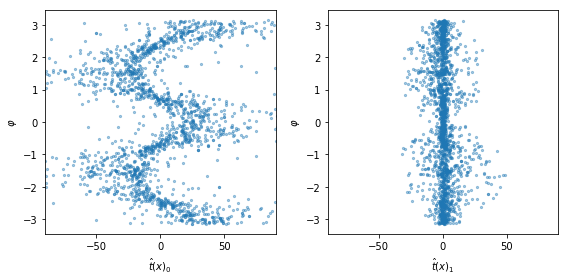

In [12]:
xmin, xmax = -90., 90.
skip=50

fig = plt.figure(figsize=(8,4))

for i in range(2):
    
    ax = plt.subplot(1,2,i+1)
    plt.scatter(that[::skip,i], x[::skip,-1], alpha=0.4, s=5.)

    plt.xlabel(r'$\hat{t}(x)_' + str(i) + '$')
    plt.ylabel(r'$\varphi$')
    
    plt.xlim(xmin, xmax)

plt.tight_layout()
plt.savefig('../../figures/wgamma/score_phi_correlation.pdf')
